<a href="https://colab.research.google.com/github/minjunsz/ML-algorithms/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=632345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1123)

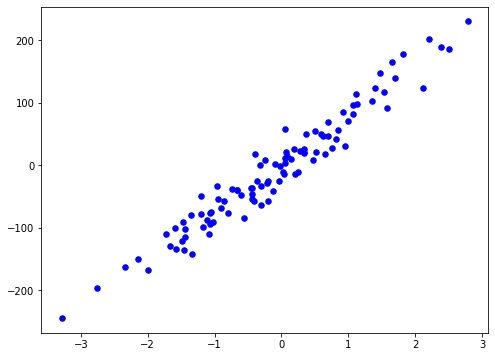

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color='b', marker="o", s=30)
plt.show()

In [12]:
class LinearRegression:
    def __init__(self, lr=1e-3, n_iter = 1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [11]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

In [14]:
linearRegressor = LinearRegression(lr=0.01)
linearRegressor.fit(X_train, y_train)
predicted_y = linearRegressor.predict(X_test)

mse_value = mse(y_test, predicted_y)
print(mse_value)

248.0464815972608


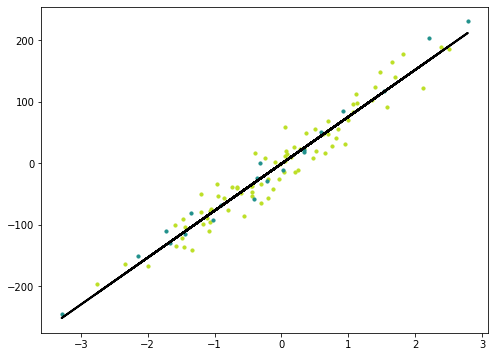

In [17]:
y_pred_line = linearRegressor.predict(X)
cmap = plt.get_cmap("viridis")
plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()